In [110]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.data', names=names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [113]:
for col in df.columns:
    print(df[col].unique())

[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  1171845  1172152  1173

In [114]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [115]:
# Preprocess the data
df.replace('?',np.nan, inplace=True)
df = df.dropna()
print(df.axes)

df.drop(['id'], 1, inplace=True)

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            689, 690, 691, 692, 693, 694, 695, 696, 697, 698],
           dtype='int64', length=683), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


C:\Users\amr_a\AppData\Local\Temp/ipykernel_21868/3711655595.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)


In [116]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(683, 10)


In [117]:
# Describe the dataset
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


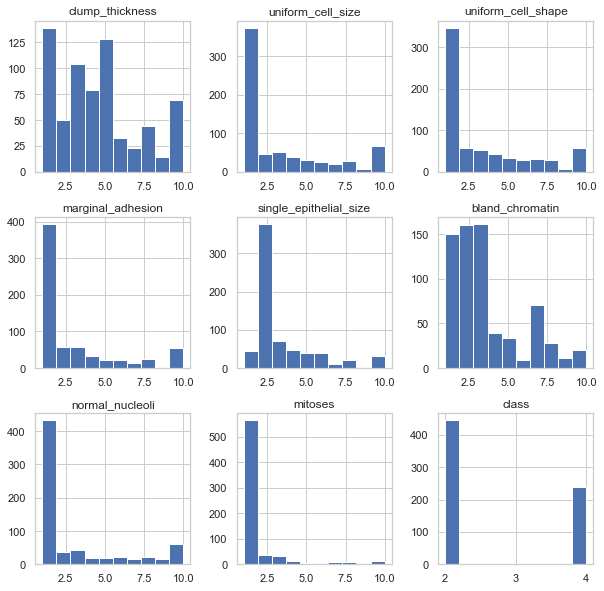

In [118]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

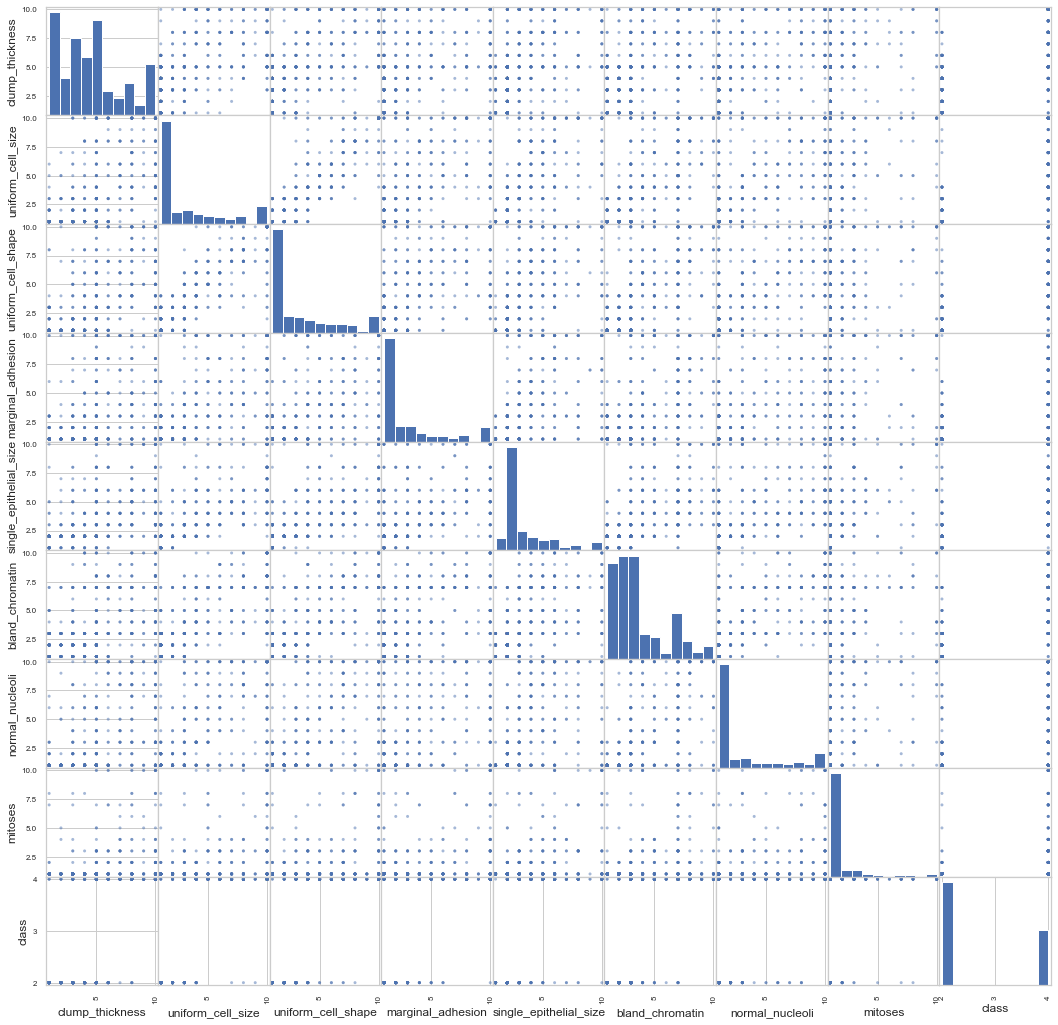

In [119]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [120]:
X = df.drop('class', axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Feature Selection

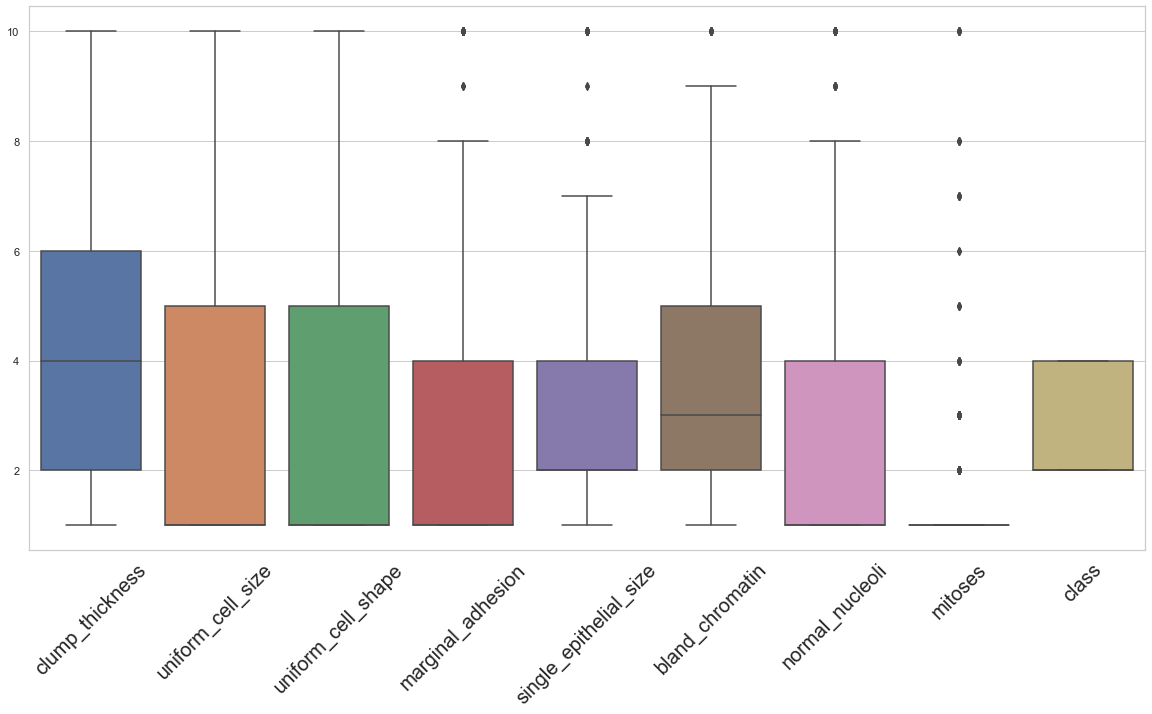

In [121]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df)
plt.xticks(fontsize=20, rotation = '45')
plt.show();

In [122]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [123]:
var_thres.get_support()
# no deleted columns due to variance threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

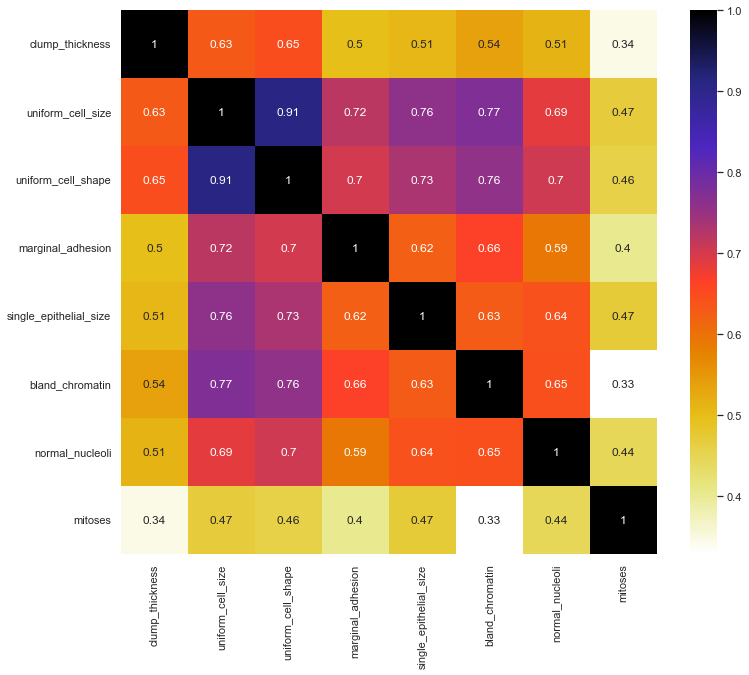

In [124]:
# Correlation

corr = X_train.corr()
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [125]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [126]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [127]:
corr_features

{'uniform_cell_shape'}

In [128]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,clump_thickness,uniform_cell_size,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
304,8,3,9,3,10,3,3,1
149,8,8,4,10,10,7,8,7
217,1,1,1,2,1,3,1,1
120,1,1,2,2,1,3,1,1
314,1,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...
112,10,3,10,2,10,7,3,3
84,3,5,8,8,9,7,10,7
53,5,5,8,10,8,7,3,7
216,1,1,1,2,1,2,1,1


In [129]:
# Mutual info

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

uniform_cell_size         0.479431
uniform_cell_shape        0.452372
bare_nuclei               0.412590
bland_chromatin           0.378596
single_epithelial_size    0.362885
marginal_adhesion         0.345838
normal_nucleoli           0.322906
clump_thickness           0.294808
mitoses                   0.129293
dtype: float64

<AxesSubplot:>

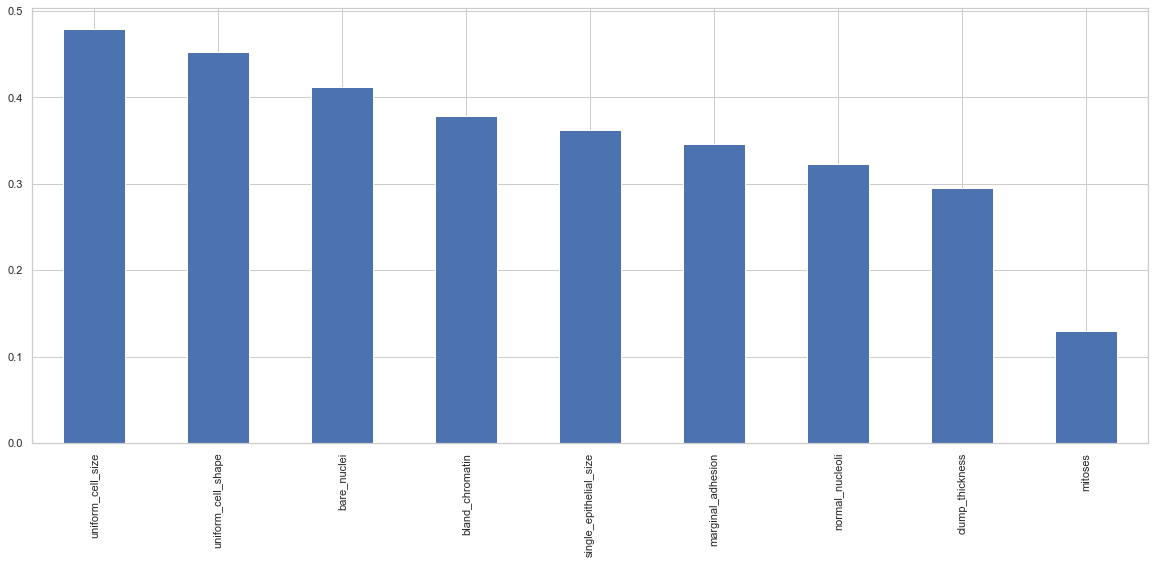

In [130]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [132]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['uniform_cell_size', 'uniform_cell_shape', 'single_epithelial_size',
       'bare_nuclei', 'bland_chromatin'],
      dtype='object')

In [143]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_values(ascending=False)
cols = p_values.index[:5].tolist()

In [145]:
# Choose Selected

X_train = X_train[cols]
X_test = X_test[cols]

In [146]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 42, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.963434 (0.027016)
SVM: 0.963401 (0.021716)


In [147]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
0.9343065693430657
              precision    recall  f1-score   support

           2       0.91      0.99      0.95        79
           4       0.98      0.86      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.92      0.93       137
weighted avg       0.94      0.93      0.93       137

SVM
0.9416058394160584
              precision    recall  f1-score   support

           2       0.92      0.99      0.95        79
           4       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



In [150]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9416058394160584
[2]


C:\Users\amr_a\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [151]:
import pickle
pickle.dump(clf, open('breast.pkl', 'wb'))